## SURF and HOG Feature Descriptor Implementation

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('images/table_image.jpg', cv2.IMREAD_GRAYSCALE)

In [9]:
try:
    # SURF is in xfeatures2d module (requires opencv-contrib-python)
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img, None)
    
    surf_img = cv2.drawKeypoints(
        img, keypoints_surf, None,
        (0, 255, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(7, 6))
    plt.imshow(surf_img, cmap='gray')
    plt.title("SURF Feature Detection and Description")
    plt.axis('off')
    plt.show()

    print("SURF Detected Keypoints:", len(keypoints_surf))
    print("SURF Descriptor Shape:", descriptors_surf.shape)
    print("Example SURF Descriptor (first 10 values):")
    print(descriptors_surf[0][:10])

except AttributeError:
    print("⚠ SURF is not available in your OpenCV installation.")
    print("Install using: pip install opencv-contrib-python")
    keypoints_surf, descriptors_surf = None, None

⚠ SURF is not available in your OpenCV installation.
Install using: pip install opencv-contrib-python


In [10]:
# HOG (Histogram of Oriented Gradients)

# Initialize HOG descriptor
hog = cv2.HOGDescriptor()

In [ ]:
# Compute HOG features
hog_features = hog.compute(img)


In [12]:

# Visualize gradients (optional simple visualization)
gx = cv2.Sobel(np.float32(img), cv2.CV_32F, 1, 0, ksize=1)

gy = cv2.Sobel(np.float32(img), cv2.CV_32F, 0, 1, ksize=1)

magnitude, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

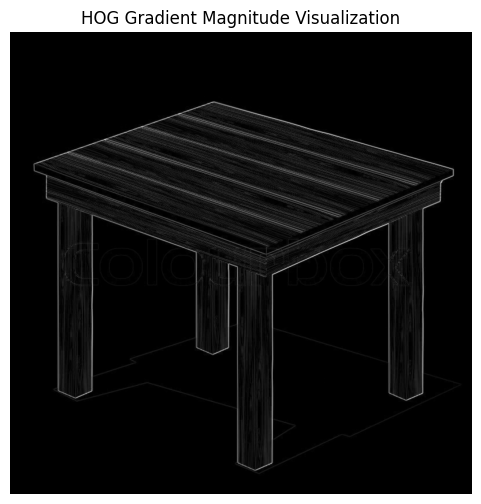

In [13]:
plt.figure(figsize=(7, 6))
plt.imshow(magnitude, cmap='gray')
plt.title("HOG Gradient Magnitude Visualization")
plt.axis('off')
plt.show()

In [14]:
print("✅HOG Feature Vector Length:", len(hog_features))
print("Example of HOG Descriptor (first 10 values):")
print(hog_features[:10].flatten())

✅HOG Feature Vector Length: 29880900
Example of HOG Descriptor (first 10 values):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
